0 0.8929229974746704
1 0.8694584965705872
2 0.8481709957122803
3 0.8288783431053162
4 0.811408281326294
5 0.7955994009971619
6 0.7813022136688232
7 0.7683770656585693
8 0.7566961646080017
9 0.7461423873901367
10 0.7366074919700623
11 0.727993905544281
12 0.7202122807502747
13 0.713181734085083
14 0.7068289518356323
15 0.7010875344276428
16 0.6958977580070496
17 0.6912054419517517
18 0.6869618892669678
19 0.6831227540969849
20 0.6796485781669617
21 0.6765041947364807
22 0.6736568212509155
23 0.6710779070854187
24 0.6687412261962891
25 0.666623592376709
26 0.6647034883499146
27 0.6629622578620911
28 0.6613826751708984
29 0.6599492430686951
30 0.658647894859314
31 0.657466471195221
32 0.6563934087753296
33 0.6554183959960938
34 0.654532253742218
35 0.6537268161773682
36 0.6529945731163025
37 0.6523282527923584
38 0.6517223119735718
39 0.6511707901954651
40 0.6506689190864563
41 0.6502121686935425
42 0.6497960686683655
43 0.6494172215461731
44 0.6490721702575684
45 0.6487574577331543
46 0.

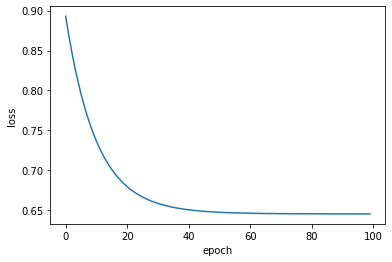

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
 
# prepare dataset
xy = np.loadtxt('./dataset/diabetes.csv', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1]) # 第一个‘：’是指读取所有行，第二个‘：’是指从第一列开始，最后一列不要
y_data = torch.from_numpy(xy[:, [-1]]) # [-1] 最后得到的是个矩阵
 
# design model using class
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6) # 输入数据x的特征是8维，x有8个特征
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid() # 将其看作是网络的一层，而不是简单的函数使用
 
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x)) # y hat
        return x
 
 
model = Model()
 
# construct loss and optimizer
# criterion = torch.nn.BCELoss(size_average = True)
criterion = torch.nn.BCELoss(reduction='mean')  
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
 
epoch_list = []
loss_list = []
# training cycle forward, backward, update
for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
    epoch_list.append(epoch)
    loss_list.append(loss.item())
 
    optimizer.zero_grad()
    loss.backward()
 
    optimizer.step()
 
 
plt.plot(epoch_list, loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [2]:
# 如果想查看某些层的参数，以神经网络的第一层参数为例，可按照以下方法进行。

# 参数说明
# 第一层的参数：
layer1_weight = model.linear1.weight.data
layer1_bias = model.linear1.bias.data
print("layer1_weight", layer1_weight)
print("layer1_weight.shape", layer1_weight.shape)
print("layer1_bias", layer1_bias)
print("layer1_bias.shape", layer1_bias.shape)

layer1_weight tensor([[ 0.0477,  0.0093,  0.2695,  0.2359, -0.1949, -0.1581,  0.2768,  0.1321],
        [-0.1100, -0.1690, -0.0311,  0.2986, -0.0375, -0.1739,  0.1394, -0.0829],
        [-0.0827, -0.1577, -0.1561,  0.2482,  0.2439,  0.0131, -0.1045,  0.1109],
        [-0.0031, -0.1698,  0.1308, -0.0163,  0.1390, -0.1251, -0.0135, -0.2218],
        [-0.1722,  0.3232, -0.2061,  0.0425,  0.3190,  0.0327,  0.1351,  0.3419],
        [ 0.2099,  0.1524,  0.3344, -0.3341, -0.3205,  0.1864, -0.0012, -0.0204]])
layer1_weight.shape torch.Size([6, 8])
layer1_bias tensor([ 0.0013, -0.1759, -0.0761,  0.2870, -0.1432,  0.0523])
layer1_bias.shape torch.Size([6])
